<a href="https://colab.research.google.com/github/LeonardFreris/LeonardFreris/blob/main/Data_Analysis_2696_2898_2760.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import python libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import array

# Read dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/compressed_dataset.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,19,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,40,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,55,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,78,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0


# Engagement distribution over time, taking into account customer_id/country_id/city_id


Barplot distributin of engagemnt over time taking into account customer_id

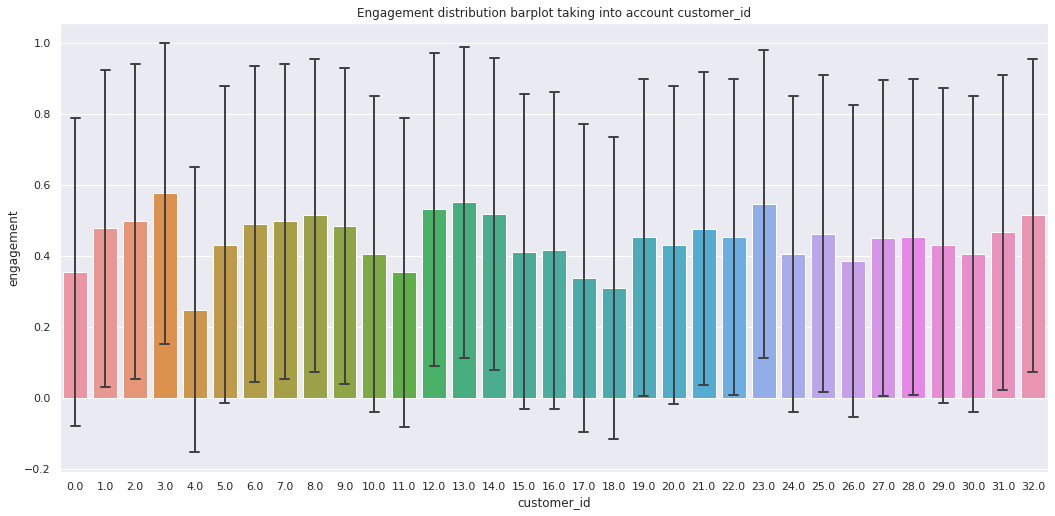

In [29]:
sns.set(rc={'figure.figsize':(17.7,8.27)})
ax = sns.barplot(x = "customer_id", y = "engagement", data = df, ci = 'sd', capsize = 0.3, errwidth = 2).set(title='Engagement distribution barplot taking into account customer_id')

From the task "Countries/Cities that follow different distribution per customer"
we take two countries_id from every list of same distribution countries and picturize the following engagement barplots which represent every county_id of the same list

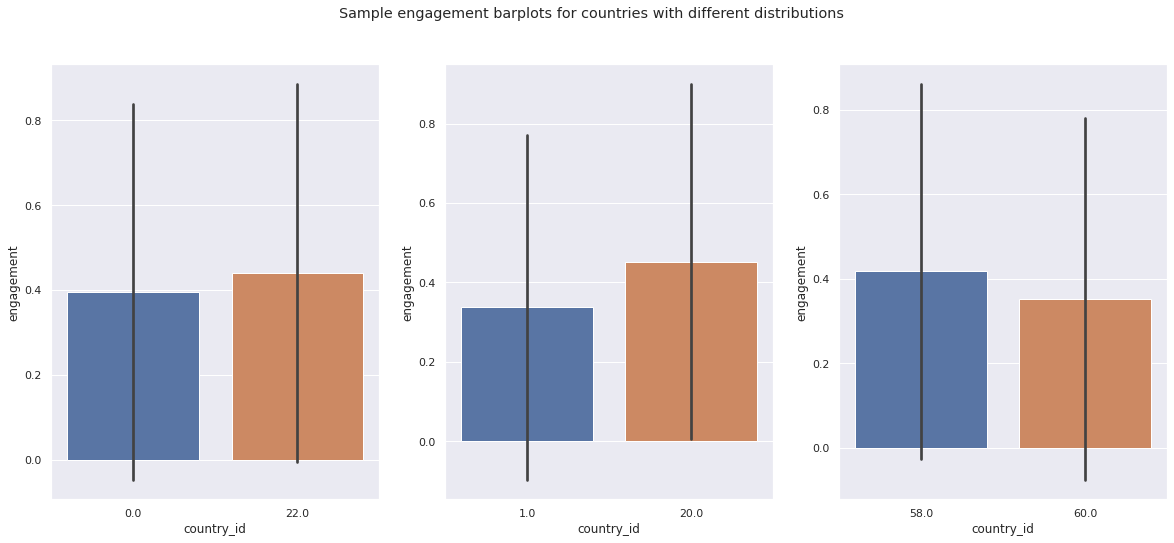

In [26]:
sampleDF_0_22 = df.loc[df['country_id'] == 0].append(df.loc[df['country_id'] == 22])
sampleDF_1_20 = df.loc[df['country_id'] == 1].append(df.loc[df['country_id'] == 20])
sampleDF_60_58 = df.loc[df['country_id'] == 60].append(df.loc[df['country_id'] == 58])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
fig.suptitle('Sample engagement barplots for countries with different distributions')
sns.barplot(x="country_id", y='engagement', data = sampleDF_0_22, ci = "sd", ax=ax1)
sns.barplot(x="country_id", y='engagement', data = sampleDF_1_20, ci = "sd", ax=ax2)
sns.barplot(x="country_id", y='engagement', data = sampleDF_60_58, ci = "sd", ax=ax3)

From the task "Countries/Cities that follow different distribution per customer"
we take random cities_id samples from every list of same distribution cities and picturize the following engagement barplots which represent every city_id of the same list

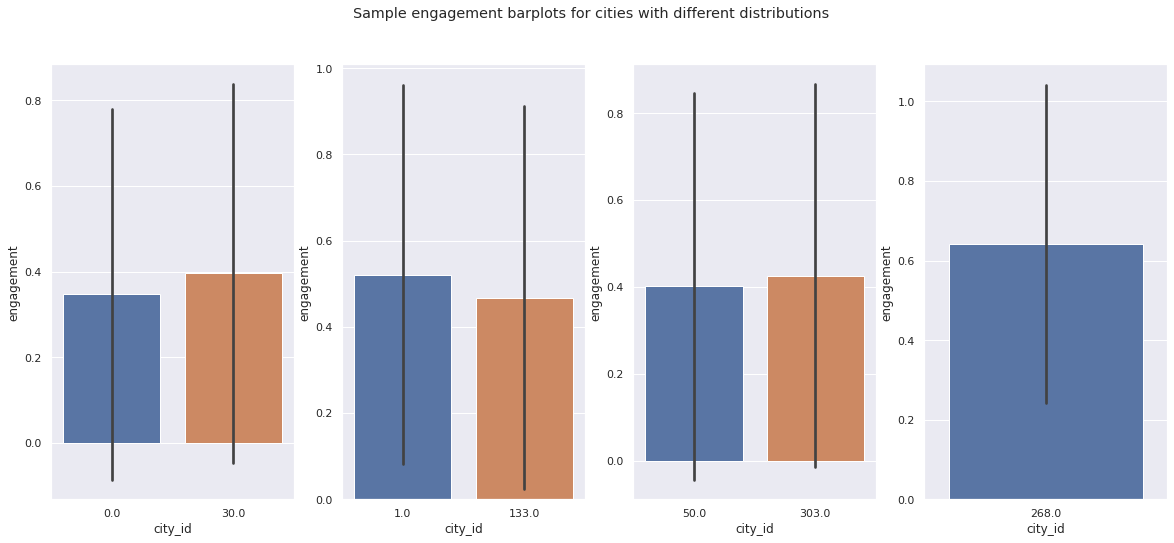

In [25]:
sampleDF_0_30 = df.loc[df['city_id'] == 0].append(df.loc[df['city_id'] == 30])
sampleDF_1_133 = df.loc[df['city_id'] == 1].append(df.loc[df['city_id'] == 133])
sampleDF_50_303 = df.loc[df['city_id'] == 50].append(df.loc[df['city_id'] == 303])
sampleDF_268 = df.loc[df['city_id'] == 268]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,8))
fig.suptitle('Sample engagement barplots for cities with different distributions')
sns.barplot(x="city_id", y='engagement', data = sampleDF_0_30, ci = "sd", ax=ax1)
sns.barplot(x="city_id", y='engagement', data = sampleDF_1_133, ci = "sd", ax=ax2)
sns.barplot(x="city_id", y='engagement', data = sampleDF_50_303, ci = "sd", ax=ax3)
sns.barplot(x="city_id", y='engagement', data = sampleDF_268, ci = "sd", ax=ax4)


# QoE distribution over time taking into account customer_id/country_id/city_id

Same process with engagment task but instead of engagement information we use Qoe

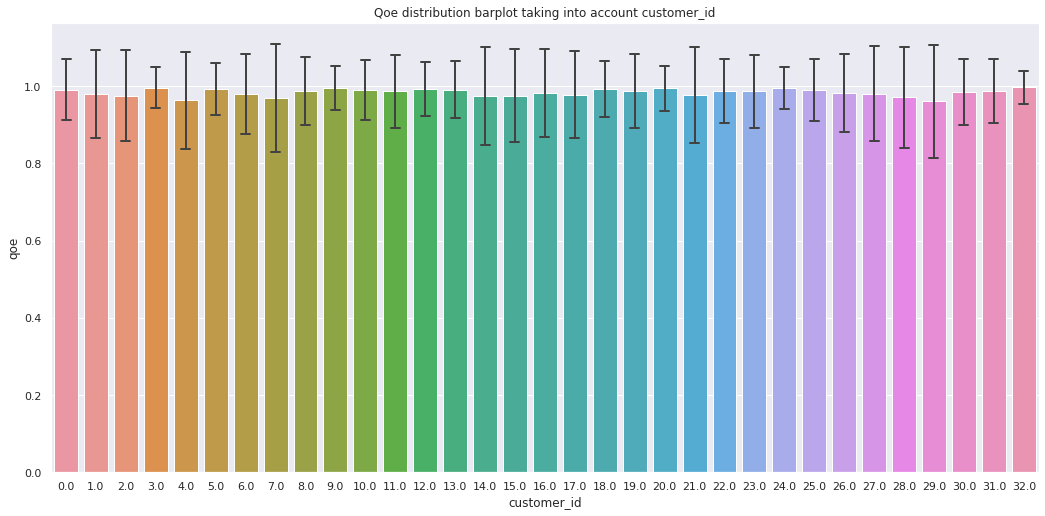

In [30]:
sns.set(rc={'figure.figsize':(17.7,8.27)})
ax = sns.barplot(x="customer_id", y="qoe", data=df, ci='sd', capsize=0.3, errwidth=2).set(title='Qoe distribution barplot taking into account customer_id')

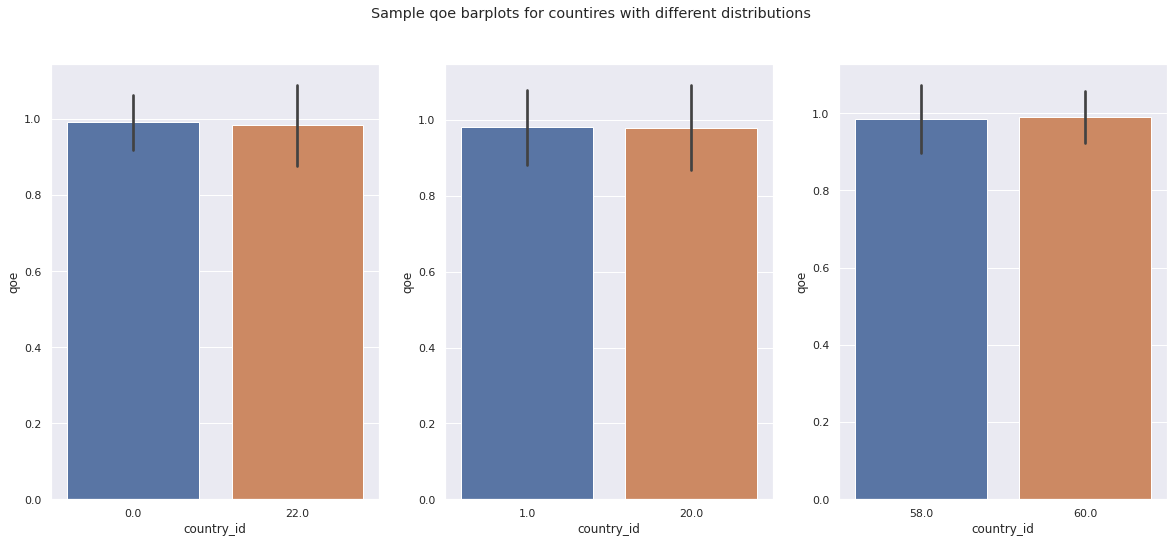

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
fig.suptitle('Sample qoe barplots for countires with different distributions')
sns.barplot(x="country_id", y='qoe', data = sampleDF_0_22, ci = "sd", ax=ax1)
sns.barplot(x="country_id", y='qoe', data = sampleDF_1_20, ci = "sd", ax=ax2)
sns.barplot(x="country_id", y='qoe', data = sampleDF_60_58, ci = "sd", ax=ax3)

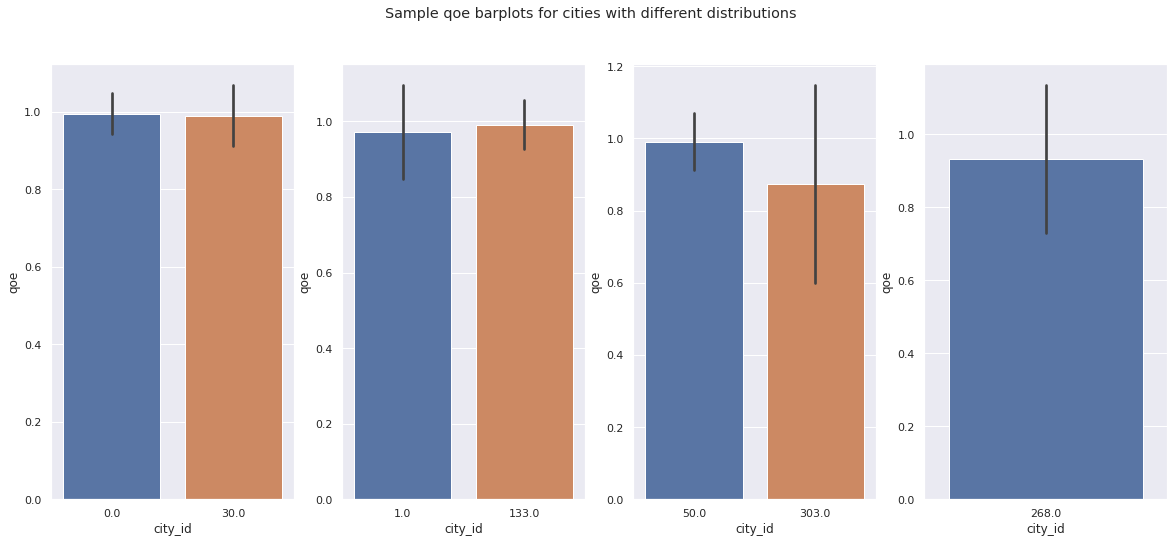

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,8))
fig.suptitle('Sample qoe barplots for cities with different distributions')
sns.barplot(x="city_id", y='qoe', data = sampleDF_0_30, ci = "sd", ax=ax1)
sns.barplot(x="city_id", y='qoe', data = sampleDF_1_133, ci = "sd", ax=ax2)
sns.barplot(x="city_id", y='qoe', data = sampleDF_50_303, ci = "sd", ax=ax3)
sns.barplot(x="city_id", y='qoe', data = sampleDF_268, ci = "sd", ax=ax4)


# Engagement/Qoe distribution differences based on viewer_type

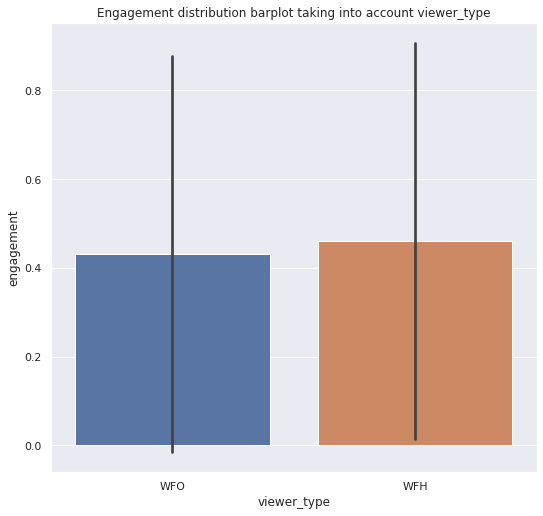

In [31]:
sns.set(rc={'figure.figsize':(8.7,8.27)})
ax = sns.barplot(x="viewer_type", y="engagement", data=df, ci="sd").set(title='Engagement distribution barplot taking into account viewer_type')

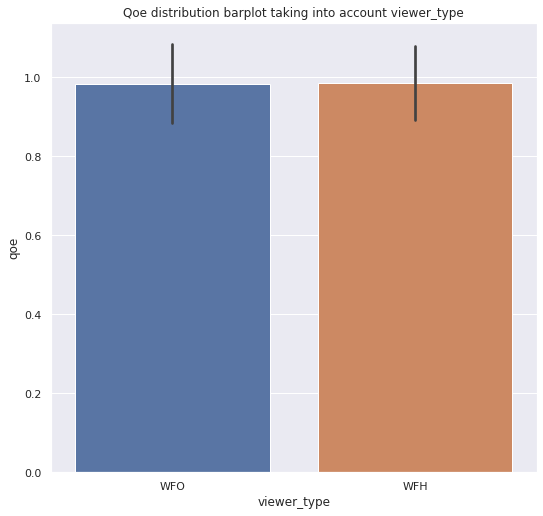

In [33]:
sns.set(rc={'figure.figsize':(8.7,8.27)})
ax = sns.barplot(x="viewer_type", y="qoe", data=df, ci="sd").set(title='Qoe distribution barplot taking into account viewer_type')

# Viewers’ engagement level duration over country/city/viewer type

***Proccess to find viewers’ engagement level duration over country_id:***

We keep the columns to help us find the viewers’ engagement level duration over country

In [ ]:
df_m = df.loc[:,['timestamp','viewer_id','country_id', 'engagement']]
df_m

,timestamp,viewer_id,country_id,engagement
0,1632762065906,11661.0,3.0,0.0
1,1632762104254,12810.0,3.0,0.9
2,1632762108299,15129.0,3.0,0.9
3,1632762112510,5860.0,3.0,0.0
4,1632762129231,4483.0,3.0,0.0
...,...,...,...,...
20615365,1647872264309,845.0,3.0,0.0
20615366,1647872276879,11100.0,3.0,0.0
20615367,1647872288293,2155.0,1.0,0.0
20615368,1647872288564,1011.0,3.0,0.9


Then we sort the minimized dataframe first by country_id then by viewer_id and finally by timestamp

In [ ]:
df_s = df_m.sort_values(['country_id', 'viewer_id', 'timestamp'], ascending=[True, True, True])
df_s.tail(50)

,timestamp,viewer_id,country_id,engagement
6748720,1639489105586,102503.0,121.0,0.00000
3966679,1639489135528,102503.0,121.0,0.25752
10459851,1639489165607,102503.0,121.0,0.44844
7057306,1639489195540,102503.0,121.0,0.90000
10357006,1639488521235,103000.0,122.0,0.77745
15303505,1639488536181,103000.0,122.0,0.65007
19325002,1639488576191,103000.0,122.0,0.90000
12828938,1639488606107,103000.0,122.0,0.90000
12931685,1639488636073,103000.0,122.0,0.90000
12210524,1639488666087,103000.0,122.0,0.90000


We convert the sorted dataframe to array and we store them to three vectors of each level duration

In [ ]:
array = df_s.to_numpy()
array

array([[1.63661859e+12, 1.51000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.63661862e+12, 1.51000000e+02, 0.00000000e+00, 0.00000000e+00],
       [1.63661865e+12, 1.51000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.63414973e+12, 1.03706000e+05, 1.23000000e+02, 0.00000000e+00],
       [1.63414976e+12, 1.03706000e+05, 1.23000000e+02, 0.00000000e+00],
       [1.63414978e+12, 1.03706000e+05, 1.23000000e+02, 0.00000000e+00]])

Compute level(bad, medium, good) duration of engagement over country

In [ ]:
j = 0
badEng = 0
medEng = 0
goodEng = 0
goodEng_vec = []
medEng_vec = []
badEng_vec = []

viewers = df_s['viewer_id'].unique()
p = df_s.shape[0]
for j in range(p):
  if (j==p-1):
    goodEng_vec.append(goodEng)
    medEng_vec.append(medEng)
    badEng_vec.append(badEng)
    #print("For the country ", array[j][2], goodEng, medEng, badEng) 
    print("good eng", goodEng_vec)
    print("med eng", medEng_vec)
    print("bad eng", badEng_vec)
    break
  if(array[j][2] == array[j+1][2]): #check next country
    if(array[j][1] == array[j+1][1]): #check next viewer_id
      timeDiff = array[j][0] - array[j-1][0]
      if(((timeDiff) >= 29000) & ((timeDiff) <= 31000)):
        if(((array[j+1][3] <= 0.3) & (array[j+1][3] >= 0)) & ((array[j][3] <= 0.3) & (array[j][3] >= 0))):
          badEng += timeDiff
        elif (((array[j+1][3] <= 0.7) & (array[j+1][3] > 0.3)) & ((array[j][3] <= 0.7) & (array[j][3] > 0.3))):
          medEng += timeDiff
        elif(((array[j+1][3] <= 1) & (array[j+1][3] > 0.7)) & ((array[j][3] <= 1) & (array[j][3] > 0.7))):
          goodEng += timeDiff
  else: 
    goodEng_vec.append(goodEng)
    medEng_vec.append(medEng)
    badEng_vec.append(badEng)
    #print("For the country ", array[j][2], goodEng, medEng, badEng) 
    badEng=0
    medEng=0
    goodEng=0

good eng [51081374442.0, 37152964521.0, 39891490162.0, 33102588320.0, 20330306674.0, 16599913404.0, 11786811415.0, 9785558844.0, 5474143930.0, 6058403603.0, 4546819967.0, 3830292337.0, 3900558838.0, 2719928555.0, 2776697089.0, 2801385436.0, 2800649456.0, 1424413265.0, 2112970561.0, 1590367466.0, 1178663005.0, 1468781833.0, 994533947.0, 1421757753.0, 691645395.0, 814124308.0, 859743718.0, 643954737.0, 620939647.0, 496713311.0, 617859229.0, 491545361.0, 498386898.0, 371732348.0, 375221563.0, 443615375.0, 445135630.0, 313722149.0, 298465335.0, 284791596.0, 203171995.0, 166175131.0, 155990053.0, 116816576.0, 175791914.0, 156530975.0, 108542991.0, 78511269.0, 94579056.0, 78538991.0, 113100045.0, 87067715.0, 91530677.0, 70891079.0, 76592710.0, 60101029.0, 59460353.0, 67943838.0, 40913005.0, 75572075.0, 26757836.0, 28440629.0, 31169856.0, 11640478.0, 27711011.0, 24711503.0, 20667041.0, 23280259.0, 15568902.0, 6329963.0, 7019795.0, 23402611.0, 8010719.0, 9123864.0, 14305656.0, 12264753.0, 1143

Find the countries with zero duration on good, medium and bad level engagement and the top 5 countries with the most duration

In [ ]:
goodEng_sort = np.sort(goodEng_vec)
i=0
k=len(goodEng_vec)
goodEng_zero = []
goodEng_top = []

for i in range(k):
  if(0==goodEng_vec[i]):
    goodEng_zero.append(i)
  elif((goodEng_sort[k-1]==goodEng_vec[i]) | (goodEng_sort[k-2]==goodEng_vec[i]) | (goodEng_sort[k-3]==goodEng_vec[i]) | (goodEng_sort[k-4]==goodEng_vec[i]) | (goodEng_sort[k-5]==goodEng_vec[i])):
    goodEng_top.append(i)
  
print("Countries with 0 duration of good Engagement: ",goodEng_zero)
print("Top 5 countries with max duration of good Engagement: ", goodEng_top)

Countries with 0 duration of good Engagement:  [85, 89, 94, 100, 103, 104, 106, 111, 116, 118, 119, 120, 123]
Top 5 countries with max duration of good Engagement:  [0, 1, 2, 3, 4]


In [ ]:
medEng_sort = np.sort(medEng_vec)
i=0
k=len(medEng_vec)
medEng_zero = []
medEng_top = []

for i in range(k):
  if(0==medEng_vec[i]):
    medEng_zero.append(i)
  elif((medEng_sort[k-1]==medEng_vec[i]) | (medEng_sort[k-2]==medEng_vec[i]) | (medEng_sort[k-3]==medEng_vec[i]) | (medEng_sort[k-4]==medEng_vec[i]) | (medEng_sort[k-5]==medEng_vec[i])):
    medEng_top.append(i)
  
print("Countries with 0 duration of medium Engagement: ",medEng_zero)
print("Top 5 countries with max duration of medium Engagement: ", medEng_top)

Countries with 0 duration of medium Engagement:  [61, 68, 69, 73, 79, 80, 81, 84, 85, 87, 88, 89, 91, 93, 94, 97, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 115, 116, 118, 119, 120, 122, 123]
Top 5 countries with max duration of medium Engagement:  [0, 1, 2, 3, 4]


In [ ]:
badEng_sort = np.sort(badEng_vec)
i=0
k=len(badEng_vec)
badEng_zero = []
badEng_top = []

for i in range(k):
  if(0==badEng_vec[i]):
    badEng_zero.append(i)
  elif((badEng_sort[k-1]==badEng_vec[i]) | (badEng_sort[k-2]==badEng_vec[i]) | (badEng_sort[k-3]==badEng_vec[i]) | (badEng_sort[k-4]==badEng_vec[i]) | (badEng_sort[k-5]==badEng_vec[i])):
    badEng_top.append(i)
  
print("Countries with 0 duration of medium Engagement: ",badEng_zero)
print("Top 5 countries with max duration of medium Engagement: ", badEng_top)

Countries with 0 duration of medium Engagement:  [122]
Top 5 countries with max duration of medium Engagement:  [0, 1, 2, 3, 5]


We plot side by side the top 5 countries with maximum duration for each engegament level

In [ ]:
i=0
k=len(badEng_vec)
country=[]
for i in range(k):
  country.append(i)

data_dur=pd.DataFrame({'goodEng_dur':goodEng_vec, 'medEng_dur':medEng_vec, 'badEng_dur':badEng_vec, 'country':country})
data_dur

,goodEng_dur,medEng_dur,badEng_dur,country
0,5.108137e+10,8.740630e+08,6.856018e+10,0
1,3.715296e+10,4.510702e+08,6.411066e+10,1
2,3.989149e+10,1.244015e+09,2.739240e+10,2
3,3.310259e+10,4.697119e+08,3.362949e+10,3
4,2.033031e+10,2.840385e+08,1.541665e+10,4
...,...,...,...,...
119,0.000000e+00,0.000000e+00,1.229969e+06,119
120,0.000000e+00,0.000000e+00,7.200270e+05,120
121,3.092700e+04,3.005300e+04,2.699560e+05,121
122,5.999090e+05,0.000000e+00,0.000000e+00,122


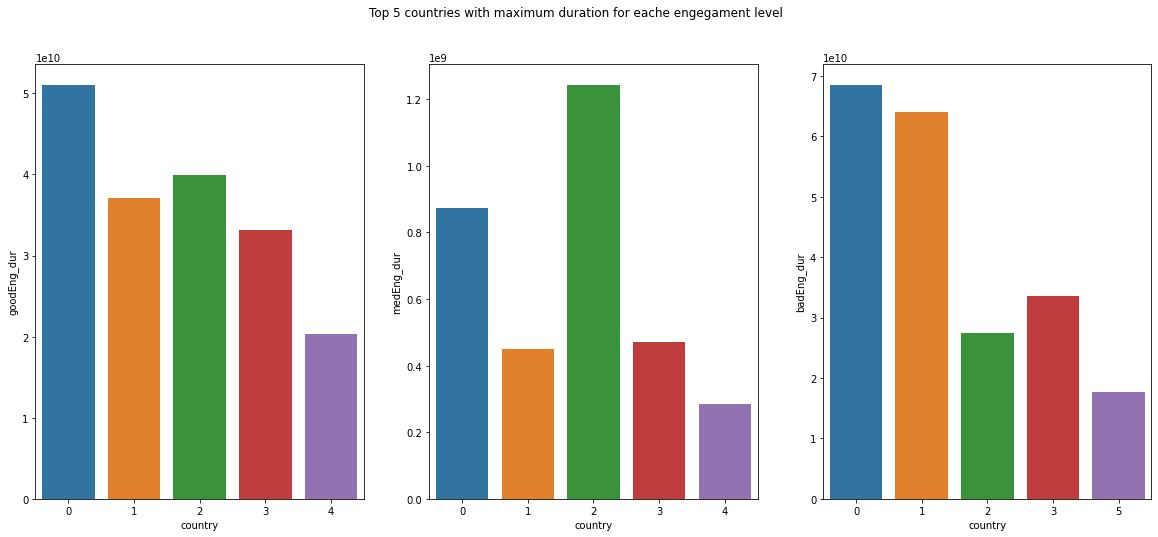

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
fig.suptitle('Top 5 countries with maximum duration for eache engegament level')
top5_good = data_dur[data_dur["country"] < 5]
sns.barplot(x="country", y='goodEng_dur', data = top5_good, ax=ax1)

top5_med = data_dur[data_dur["country"] < 5]
sns.barplot(x="country", y='medEng_dur', data = top5_med, ax=ax2)

top5_bad = data_dur[(data_dur["country"]<4)]
top5_bad = top5_bad.append(data_dur[(data_dur["country"]==5)])
sns.barplot(x="country", y='badEng_dur', data = top5_bad, ax=ax3)

***Proccess to find viewers’ engagement level duration over city_id:***

Same proccess to find viewers’ engagement level duration over city as we did on country_id

In [ ]:
df_city = df.loc[:,['timestamp','viewer_id','city_id', 'engagement']]
df_citySort = df_city.sort_values(['city_id', 'viewer_id', 'timestamp'], ascending=[True, True, True])
array_city = df_citySort.to_numpy()

In [ ]:
j = 0
badEng_city = 0
medEng_city = 0
goodEng_city = 0
goodEng_vec_city = []
medEng_vec_city = []
badEng_vec_city = []

viewers = df_citySort['viewer_id'].unique()
p = df_citySort.shape[0]
for j in range(p):
  if (j==p-1):
    goodEng_vec_city.append(goodEng_city)
    medEng_vec_city.append(medEng_city)
    badEng_vec_city.append(badEng_city) 
    print("good eng over city", goodEng_vec_city)
    print("med eng over city", medEng_vec_city)
    print("bad eng over city", badEng_vec_city)
    break
  if(array_city[j][2] == array_city[j+1][2]): #check next city
    if(array_city[j][1] == array_city[j+1][1]): #check next viewer_id
      timeDiff_city = array_city[j][0] - array_city[j-1][0]
      if(((timeDiff_city) >= 29000) & ((timeDiff_city) <= 31000)):
        if(((array_city[j+1][3] <= 0.3) & (array_city[j+1][3] >= 0)) & ((array_city[j][3] <= 0.3) & (array_city[j][3] >= 0))):
          badEng_city += timeDiff_city
        elif (((array_city[j+1][3] <= 0.7) & (array_city[j+1][3] > 0.3)) & ((array_city[j][3] <= 0.7) & (array_city[j][3] > 0.3))):
          medEng_city += timeDiff_city
        elif(((array_city[j+1][3] <= 1) & (array_city[j+1][3] > 0.7)) & ((array_city[j][3] <= 1) & (array_city[j][3] > 0.7))):
          goodEng_city += timeDiff_city
  else: 
    goodEng_vec_city.append(goodEng_city)
    medEng_vec_city.append(medEng_city)
    badEng_vec_city.append(badEng_city)
    badEng_city=0
    medEng_city=0
    goodEng_city=0

good eng over city [30412502350.0, 15610250840.0, 10495626328.0, 5702351414.0, 7038291891.0, 7482786211.0, 3425907895.0, 5325638672.0, 4294740074.0, 1970730664.0, 2841418753.0, 1695370789.0, 3020990242.0, 3180801796.0, 3352291973.0, 2356201496.0, 1414764817.0, 2422311374.0, 1464857503.0, 1869638749.0, 2086057094.0, 2085851607.0, 2052863657.0, 1710804009.0, 1399925459.0, 1161275612.0, 1684602670.0, 1512633408.0, 1710557462.0, 2083845163.0, 1175916333.0, 1058756728.0, 1639387716.0, 861895889.0, 1365786611.0, 1034247123.0, 1137677860.0, 1147229491.0, 940941476.0, 1135173789.0, 1147192234.0, 1049863593.0, 1223454744.0, 629789728.0, 604908219.0, 1075383695.0, 532087112.0, 794668712.0, 653202612.0, 41390323.0, 615148475.0, 971604305.0, 843184500.0, 347722628.0, 683398472.0, 758931919.0, 632721521.0, 704785196.0, 639929926.0, 750320467.0, 599103580.0, 586912089.0, 607310900.0, 565931277.0, 101129994.0, 511040356.0, 377848777.0, 701103803.0, 605053461.0, 370980042.0, 510939695.0, 334140244.0, 

In [ ]:
badEng_sort_city = np.sort(badEng_vec_city)
goodEng_sort_city = np.sort(goodEng_vec_city)
i=0
k=len(goodEng_vec_city)
goodEng_zero_city = []
goodEng_top_city = []

for i in range(k):
  if(0==goodEng_vec_city[i]):
    goodEng_zero_city.append(i)
  elif((goodEng_sort_city[k-1]==goodEng_vec_city[i]) | (goodEng_sort_city[k-2]==goodEng_vec_city[i]) | (goodEng_sort_city[k-3]==goodEng_vec_city[i]) | (goodEng_sort_city[k-4]==goodEng_vec_city[i]) | (goodEng_sort_city[k-5]==goodEng_vec_city[i]) | (goodEng_sort_city[k-6]==goodEng_vec_city[i]) | (goodEng_sort_city[k-7]==goodEng_vec_city[i]) | (goodEng_sort_city[k-8]==goodEng_vec_city[i]) | (goodEng_sort_city[k-9]==goodEng_vec_city[i]) | (goodEng_sort_city[k-10]==goodEng_vec_city[i])):
    goodEng_top_city.append(i)
  
print("Cities with 0 duration of good Engagement: ",goodEng_zero_city)
print("Top 10 cities with max duration of good Engagement: ", goodEng_top_city)

Cities with 0 duration of good Engagement:  [577, 826, 859, 892, 1167, 1228, 1348, 1489, 1490, 1502, 1560, 1575, 1589, 1628, 1638, 1718, 1721, 1725, 1728, 1740, 1746, 1749, 1773, 1791, 1832, 1882, 1888, 1899, 1913, 1915, 1916, 1920, 1924, 1928, 1930, 1945, 1948, 1961, 1963, 1964, 1990, 2001, 2013, 2022, 2034, 2071, 2074, 2119, 2159, 2185, 2191, 2199, 2202, 2208, 2220, 2249, 2255, 2293, 2295, 2305, 2313, 2316, 2324, 2335, 2336, 2337, 2366, 2367, 2389, 2390, 2405, 2407, 2410, 2427, 2431, 2434, 2447, 2465, 2485, 2494, 2505, 2520, 2526, 2530, 2536, 2543, 2546, 2560, 2570, 2583, 2598, 2602, 2605, 2612, 2617, 2619, 2632, 2644, 2652, 2653, 2658, 2662, 2664, 2666, 2669, 2678, 2679, 2680, 2684, 2685, 2701, 2707, 2709, 2722, 2727, 2735, 2739, 2740, 2750, 2755, 2767, 2774, 2781, 2784, 2788, 2800, 2802, 2817, 2829, 2834, 2838, 2843, 2844, 2849, 2854, 2856, 2857, 2858, 2871, 2874, 2877, 2882, 2885, 2886, 2889, 2894, 2904, 2909, 2912, 2914, 2940, 2949, 2954, 2955, 2957, 2959, 2961, 2962, 2976, 2977,

In [ ]:
medEng_sort_city = np.sort(medEng_vec_city)
i=0
k=len(medEng_vec_city)
medEng_zero_city = []
medEng_top_city = []

for i in range(k):
  if(0==medEng_vec_city[i]):
    medEng_zero_city.append(i)
  elif((medEng_sort_city[k-1]==medEng_vec_city[i]) | (medEng_sort_city[k-2]==medEng_vec_city[i]) | (medEng_sort_city[k-3]==medEng_vec_city[i]) | (medEng_sort_city[k-4]==medEng_vec_city[i]) | (medEng_sort_city[k-5]==medEng_vec_city[i]) | (medEng_sort_city[k-6]==medEng_vec_city[i]) | (medEng_sort_city[k-7]==medEng_vec_city[i]) | (medEng_sort_city[k-8]==medEng_vec_city[i]) | (medEng_sort_city[k-9]==medEng_vec_city[i]) | (medEng_sort_city[k-10]==medEng_vec_city[i])):
    medEng_top_city.append(i)
  
print("Cities with 0 duration of medium Engagement: ",medEng_zero_city)
print("Top 5 cities with max duration of medium Engagement: ", medEng_top_city)

Cities with 0 duration of medium Engagement:  [129, 156, 166, 173, 219, 295, 314, 372, 442, 454, 461, 488, 490, 495, 498, 512, 523, 526, 532, 543, 554, 555, 566, 568, 572, 577, 586, 592, 593, 603, 604, 613, 615, 620, 622, 623, 625, 626, 635, 638, 643, 645, 647, 648, 660, 662, 672, 675, 681, 683, 687, 689, 691, 693, 694, 701, 719, 720, 721, 722, 726, 728, 729, 733, 735, 740, 750, 752, 755, 760, 772, 773, 782, 788, 792, 804, 806, 808, 815, 821, 826, 830, 833, 835, 837, 844, 845, 850, 851, 852, 853, 859, 864, 865, 867, 870, 874, 879, 880, 884, 886, 887, 890, 892, 896, 898, 901, 903, 904, 905, 908, 909, 913, 916, 918, 921, 933, 936, 948, 950, 955, 956, 957, 961, 963, 966, 968, 972, 973, 975, 983, 984, 987, 988, 989, 991, 997, 998, 1002, 1005, 1006, 1008, 1012, 1013, 1014, 1015, 1016, 1019, 1021, 1026, 1027, 1028, 1031, 1034, 1035, 1037, 1040, 1041, 1043, 1045, 1049, 1052, 1055, 1057, 1058, 1059, 1062, 1063, 1064, 1066, 1067, 1069, 1070, 1071, 1075, 1077, 1081, 1083, 1085, 1087, 1090, 1092,

In [ ]:
badEng_sort_city = np.sort(badEng_vec_city)
i=0
k=len(badEng_vec_city)
badEng_zero_city = []
badEng_top_city = []

for i in range(k):
  if(0==badEng_vec_city[i]):
    badEng_zero_city.append(i)
  elif((badEng_sort_city[k-1]==badEng_vec_city[i]) | (badEng_sort_city[k-2]==badEng_vec_city[i]) | (badEng_sort_city[k-3]==badEng_vec_city[i]) | (badEng_sort_city[k-4]==badEng_vec_city[i]) | (badEng_sort_city[k-5]==badEng_vec_city[i]) | (badEng_sort_city[k-6]==badEng_vec_city[i]) | (badEng_sort_city[k-7]==badEng_vec_city[i]) | (badEng_sort_city[k-8]==badEng_vec_city[i]) | (badEng_sort_city[k-9]==badEng_vec_city[i]) | (badEng_sort_city[k-10]==badEng_vec_city[i])):
    badEng_top_city.append(i)
  
print("Cities with 0 duration of medium Engagement: ",badEng_zero_city)
print("Top 5 cities with max duration of medium Engagement: ", badEng_top_city)

Cities with 0 duration of medium Engagement:  [1431, 1593, 1934, 1981, 1996, 2003, 2028, 2055, 2102, 2141, 2204, 2221, 2267, 2288, 2333, 2362, 2391, 2467, 2478, 2645, 2660, 2693, 2761, 2790, 2911, 2946, 3014, 3017, 3021, 3030, 3050, 3058, 3093, 3102, 3106, 3124, 3152, 3163, 3168, 3170, 3190, 3195, 3201, 3213, 3242, 3244, 3254, 3262, 3272, 3281, 3287, 3288, 3293, 3297, 3330, 3334, 3339, 3355, 3393, 3416, 3432, 3439, 3444, 3460, 3500, 3511, 3516, 3527, 3548, 3562, 3563, 3566, 3571, 3583, 3588, 3593, 3605, 3619, 3672, 3683, 3688, 3699, 3710, 3740, 3745, 3750, 3765, 3768, 3775, 3778, 3782, 3787, 3792, 3795, 3797, 3804, 3807, 3837, 3842, 3843, 3848, 3861, 3863, 3868, 3875, 3880, 3882, 3887, 3915, 3923, 3924, 3929, 3933, 3945, 3970, 3975, 3981, 3996, 3999, 4004, 4030, 4031, 4037, 4061, 4062, 4069, 4076, 4080, 4110, 4117, 4123, 4133, 4139, 4144, 4167, 4170, 4171, 4186, 4189, 4204, 4212, 4213, 4214, 4224, 4228, 4229, 4231, 4239, 4242, 4249, 4254, 4257, 4265, 4270, 4272, 4273, 4276, 4283, 4286,

In [ ]:
i=0
k=len(badEng_vec_city)
city=[]
for i in range(k):
  city.append(i)

data_dur_city=pd.DataFrame({'goodEng_dur_city':goodEng_vec_city, 'medEng_dur_city':medEng_vec_city, 'badEng_dur_city':badEng_vec_city, 'city':city})
data_dur_city

,goodEng_dur_city,medEng_dur_city,badEng_dur_city,city
0,3.041250e+10,455075365.0,5.117376e+10,0
1,1.561025e+10,294099368.0,1.150500e+10,1
2,1.049563e+10,142706188.0,1.116035e+10,2
3,5.702351e+09,81988046.0,9.976727e+09,3
4,7.038292e+09,86638022.0,5.165332e+09,4
...,...,...,...,...
8238,0.000000e+00,0.0,0.000000e+00,8238
8239,0.000000e+00,0.0,0.000000e+00,8239
8240,0.000000e+00,0.0,0.000000e+00,8240
8241,0.000000e+00,0.0,0.000000e+00,8241


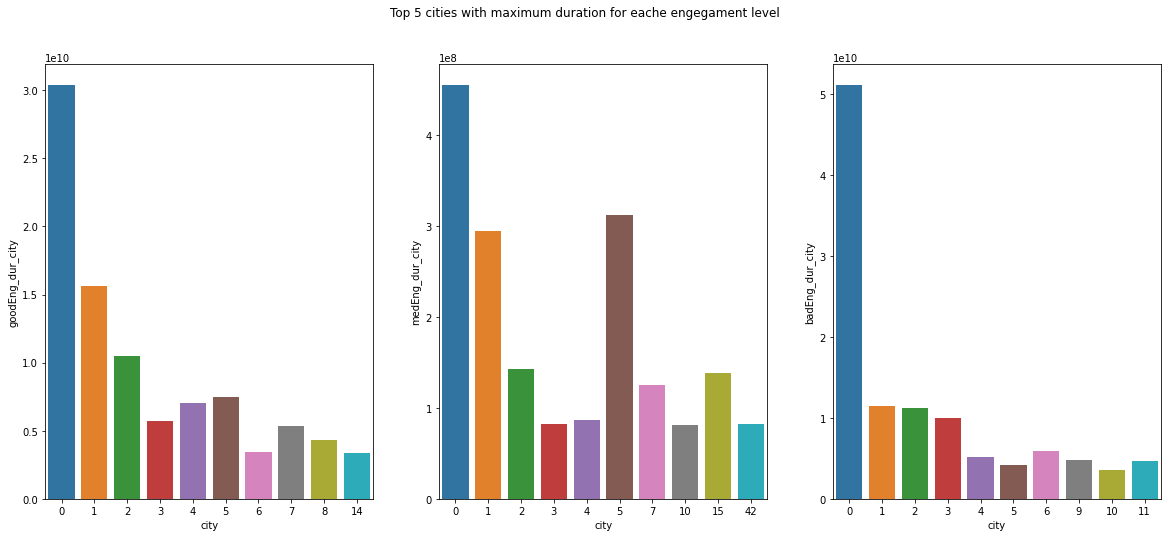

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
fig.suptitle('Top 5 cities with maximum duration for eache engegament level')

top5_good_city = data_dur_city[data_dur_city["city"] < 9]
top5_good_city = top5_good_city.append(data_dur_city[(data_dur_city["city"]==14)])
sns.barplot(x="city", y='goodEng_dur_city', data = top5_good_city, ax=ax1)

top5_med_city = data_dur_city[data_dur_city["city"] < 6]
top5_med_city = top5_med_city.append(data_dur_city[(data_dur_city["city"]==7)])
top5_med_city = top5_med_city.append(data_dur_city[(data_dur_city["city"]==10)])
top5_med_city = top5_med_city.append(data_dur_city[(data_dur_city["city"]==15)])
top5_med_city = top5_med_city.append(data_dur_city[(data_dur_city["city"]==42)])
sns.barplot(x="city", y='medEng_dur_city', data = top5_med_city, ax=ax2)

top5_bad_city = data_dur_city[data_dur_city["city"] < 7]
top5_bad_city = top5_bad_city.append(data_dur_city[(data_dur_city["city"]==9)])
top5_bad_city = top5_bad_city.append(data_dur_city[(data_dur_city["city"]==10)])
top5_bad_city = top5_bad_city.append(data_dur_city[(data_dur_city["city"]==11)])
sns.barplot(x="city", y='badEng_dur_city', data = top5_bad_city, ax=ax3)

***Proccess to find viewers’ engagement level duration over viewer_type:***

We keep the columns to help us find the viewers' engagement level duration over viewer_type, sort them first by viewer_type, then by viewer_id and finally by timestampt. In addition we convert this new dataframe into array in order to have more agility among the data

In [ ]:
df_vt = df.loc[:,['timestamp','viewer_id','viewer_type', 'engagement']]
df_vtSort = df_vt.sort_values(['viewer_type', 'viewer_id', 'timestamp'], ascending=[True, True, True])
array_vt = df_vtSort.to_numpy()

Computation of viewers’ engagement level duration over WFH and WFO

In [ ]:
j = 0
badEng_vt = 0
medEng_vt = 0
goodEng_vt = 0
goodEng_vec_vt = []
medEng_vec_vt = []
badEng_vec_vt = []

viewers = df_vtSort['viewer_id'].unique()
p = df_vtSort.shape[0]
for j in range(p):
  if (j==p-1):
    goodEng_vec_vt.append(goodEng_vt)
    medEng_vec_vt.append(medEng_vt)
    badEng_vec_vt.append(badEng_vt) 
    print("good eng over WFH and WFO", goodEng_vec_vt)
    print("med eng over  WFH and WFO", medEng_vec_vt)
    print("bad eng over  WFH and WFO", badEng_vec_vt)
    break
  if(array_vt[j][2] == array_vt[j+1][2]): #check next viewer_type
    if(array_vt[j][1] == array_vt[j+1][1]): #check next viewer_id
      timeDiff_vt = array_vt[j][0] - array_vt[j-1][0]
      if(((timeDiff_vt) >= 29000) & ((timeDiff_vt) <= 31000)):
        if(((array_vt[j+1][3] <= 0.3) & (array_vt[j+1][3] >= 0)) & ((array_vt[j][3] <= 0.3) & (array_vt[j][3] >= 0))):
          badEng_vt += timeDiff_vt
        elif (((array_vt[j+1][3] <= 0.7) & (array_vt[j+1][3] > 0.3)) & ((array_vt[j][3] <= 0.7) & (array_vt[j][3] > 0.3))):
          medEng_vt += timeDiff_vt
        elif(((array_vt[j+1][3] <= 1) & (array_vt[j+1][3] > 0.7)) & ((array_vt[j][3] <= 1) & (array_vt[j][3] > 0.7))):
          goodEng_vt += timeDiff_vt
  else: 
    goodEng_vec_vt.append(goodEng_vt)
    medEng_vec_vt.append(medEng_vt)
    badEng_vec_vt.append(badEng_vt)
    badEng_vt=0
    medEng_vt=0
    goodEng_vt=0

good eng over WFH and WFO [83578667755, 191779458632]
med eng over  WFH and WFO [1722158106, 3369402391]
bad eng over  WFH and WFO [82289462546, 215729535924]


We plot side by side the viewer's engegament level duration working from home and working from office

In [ ]:
i=0
viewer_type = ['WFH' ,'WFO']
data_dur_vt=pd.DataFrame({'goodEng_dur_vt':goodEng_vec_vt, 'medEng_dur_vt':medEng_vec_vt, 'badEng_dur_vt':badEng_vec_vt, 'viewer_type':viewer_type})
data_dur_vt

,goodEng_dur_vt,medEng_dur_vt,badEng_dur_vt,viewer_type
0,83578667755,1722158106,82289462546,WFH
1,191779458632,3369402391,215729535924,WFO


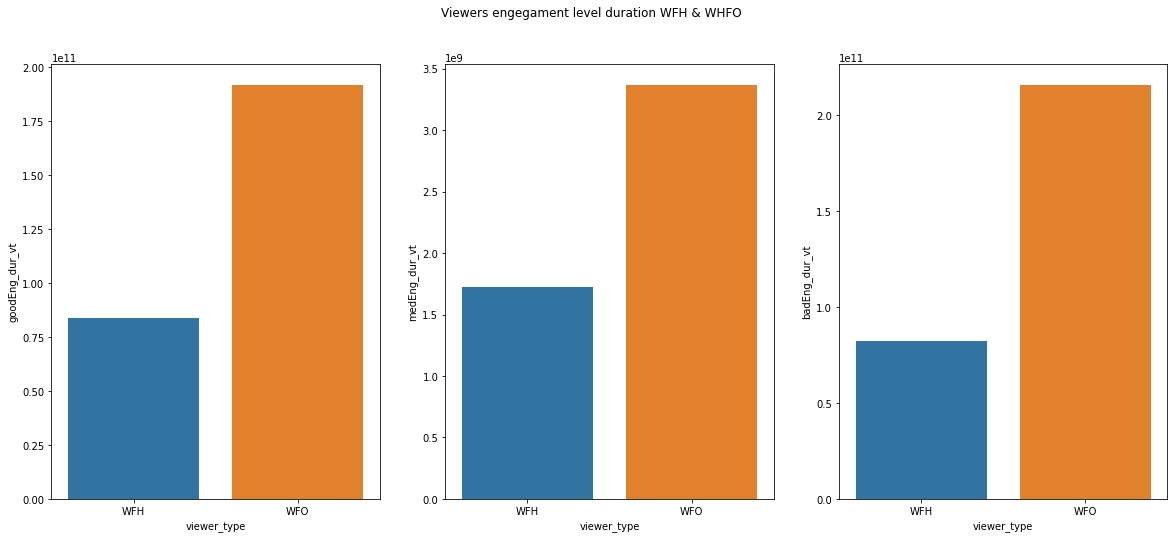

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
fig.suptitle('Viewers engegament level duration WFH & WHFO')

sns.barplot(x="viewer_type", y='goodEng_dur_vt', data = data_dur_vt, ax=ax1)
sns.barplot(x="viewer_type", y='medEng_dur_vt', data = data_dur_vt, ax=ax2)
sns.barplot(x="viewer_type", y='badEng_dur_vt', data = data_dur_vt, ax=ax3)

# Countries/Cities that follow different distribution per customer

We create an array called final that contains the appearance probability each customer for every country_id

In [35]:
i=0
percentage_array = [0]*33
k=df["country_id"].value_counts().shape[0]
for i in range(k):
  subsetDf = df.loc[ lambda x : (x['country_id'] == i).tolist()]
  temp = subsetDf['customer_id'].value_counts().reindex(
    df.customer_id.unique(), fill_value = 0).sort_index()
  percentage_data = temp/temp.sum()
  percentage_vector =  percentage_data.to_numpy()
  percentage_array = np.vstack([percentage_array, percentage_vector])
final = np.delete(percentage_array, (0), axis=0)

We create a recursive function to place the similar distribution countries into different lists. The comparison fulfilled withe use of Kolmogorov–Smirnov test


In [ ]:
from scipy.stats import ks_2samp
def recurse(dists):
  same = []
  diff = []
  if dists == []:
    return
  j = 0
  for j in range(len(dists)):
    (ks, p) = ks_2samp(final[dists[0]], final[dists[j]])
    if  p < 0.01:
      diff.append(dists[j])
    else:
      same.append(dists[j]) 
  print(same)
  recurse(diff)
i=0
dists = []
same = []
dif = []
for i in range(k):
  dists.append(i)
recurse(dists)

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 49, 59, 64]
[1, 20]
[15, 24, 26, 41, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123]


We plot an indicative distribution for one country of every list we created above using KDE method

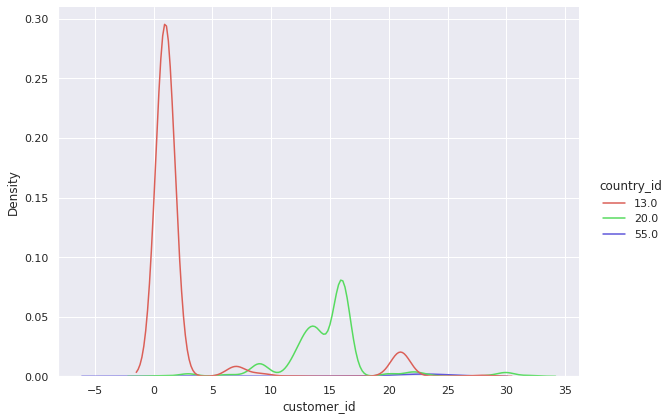

In [ ]:
dist_0_1_15 = df[(df["country_id"] == 13 ) ]
dist_0_1_15 = dist_0_1_15.append(df[(df["country_id"] == 20 ) ])
dist_0_1_15 = dist_0_1_15.append(df[(df["country_id"] == 55 ) ])
sns.displot(
    data = dist_0_1_15,
    x = "customer_id",
    hue="country_id",
    kind="kde",
    aspect=1.4,
    height=6,
    palette = sns.color_palette("hls", 3)
)

Same process as for the countries distribution to place same distribution cities into lists in order to see the differnces

In [ ]:
i=0
percentage_array_city = [0]*33
k=df["city_id"].value_counts().shape[0]
for i in range(k):
  subsetDf = df.loc[ lambda x : (x['city_id'] == i).tolist()]
  temp_city = subsetDf['customer_id'].value_counts().reindex(
    df.customer_id.unique(), fill_value = 0).sort_index()
  percentage_data_city = temp_city/temp_city.sum()
  percentage_vector_city =  percentage_data_city.to_numpy()
  percentage_array_city = np.vstack([percentage_array_city, percentage_vector_city])
final_city = np.delete(percentage_array_city, (0), axis=0)

In [ ]:
from scipy.stats import ks_2samp
def recurse(dists_city):
  same_city = []
  diff_city = []
  if dists_city == []:
    return
  j = 0
  for j in range(len(dists_city)):
    (ks, p) = ks_2samp(final_city[dists_city[0]], final_city[dists_city[j]])
    if  p < 0.1:
      diff_city.append(dists_city[j])
    else:
      same_city.append(dists_city[j]) 
  print(same_city)
  recurse(diff_city)
i = 0
dists_city = []
same_city = []
diff_city = []
for i in range(k):
  dists_city.append(i)
recurse(dists_city)

[0, 2, 3, 4, 5, 8, 9, 12, 14, 15, 16, 17, 18, 20, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 148, 150, 151, 152, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 

We use one city_id from every list to pictrurize the differnces between the lists with the same distributions

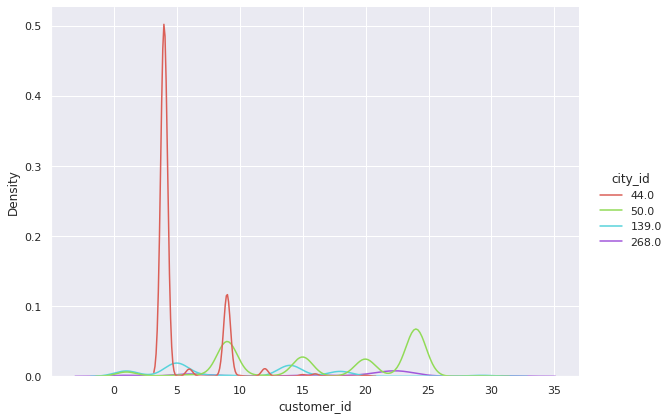

In [44]:
distCities_44_139_50_268 = df[(df["city_id"] == 44)]
distCities_44_139_50_268 = distCities_44_139_50_268.append(df[(df["city_id"] == 139)])
distCities_44_139_50_268 = distCities_44_139_50_268.append(df[(df["city_id"] == 50)])
distCities_44_139_50_268 = distCities_44_139_50_268.append(df[(df["city_id"] == 268)])
sns.displot (
    data = distCities_44_139_50_268,
    x = "customer_id",
    hue="city_id",
    kind="kde",
    aspect=1.4,
    height=6,
    palette = sns.color_palette("hls", 4)
)

# Correlations between the data points mentioned in Section 2 of the Topic 4

Heatmap of linear correlation via Pearson method between all the datapoints of our dataframe

[Text(0.5, 1.0, 'Linear correlation via Pearson')]

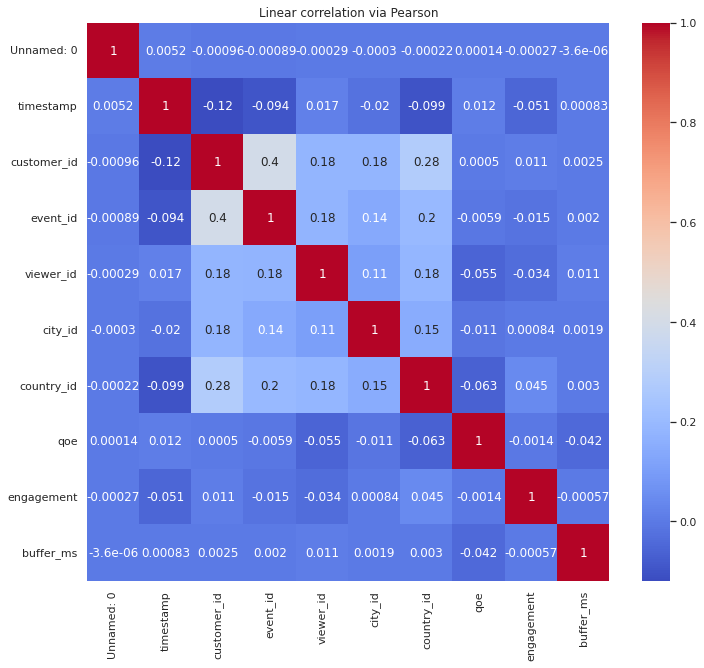

In [45]:
sns.set(rc = {'figure.figsize':(11.7,10.27)})
sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = "coolwarm").set(title='Linear correlation via Pearson')

Heatmap of non-linear correlation via Spearman method between all the datapoints of our dataframe

[Text(0.5, 1.0, 'Non-Linear correlation via Spearman')]

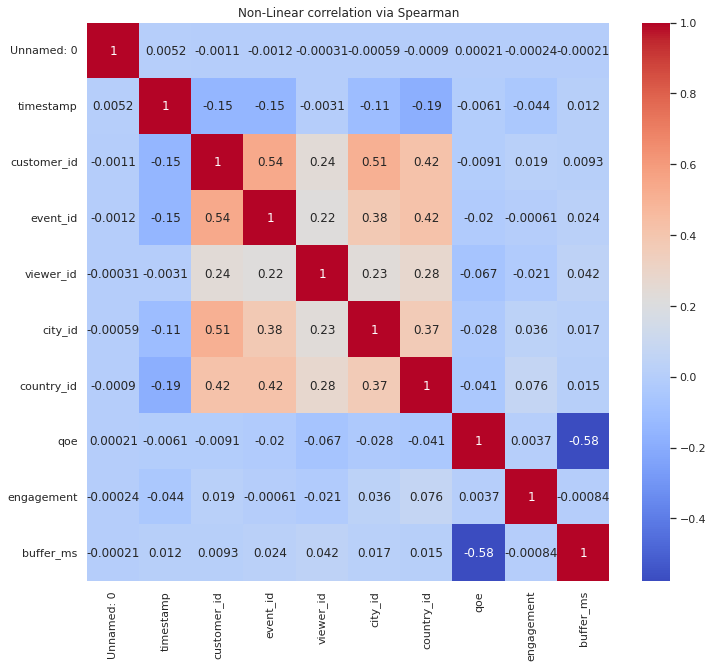

In [46]:
sns.set(rc={'figure.figsize':(11.7,10.27)})
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap = "coolwarm").set(title='Non-Linear correlation via Spearman')

# Correlations between viewer engagement and the following factors:

**i) Number of viewers during the event**

We isolate the columns event_id, engagement, viewer_id of our initial dataframe into a new one and then we group it by event_id.

Then we calculate the number of viewers and the mean engagement in every event

In [48]:
tempEV = df.groupby(['event_id'], as_index=False)['viewer_id'].count()
tempEE = df.groupby(['event_id'], as_index=False)['engagement'].mean()
groupedbyEvent = tempEE.join(tempEV['viewer_id'])
groupedbyEvent.rename(columns = {'viewer_id':'number_of_viewers', 'engagement':'avg_engagement'}, inplace = True)
groupedbyEvent

,event_id,avg_engagement,number_of_viewers
0,0.0,0.388638,1096821
1,1.0,0.391441,1020610
2,2.0,0.557737,709163
3,3.0,0.289493,403835
4,4.0,0.639439,375996
...,...,...,...
726,729.0,0.853272,46
727,730.0,0.247916,41
728,731.0,0.000000,25
729,732.0,0.000000,20


Linear correlation between the avg_angamenet and the number_of_viewers of the events with Pearson method

In [50]:
groupedbyEvent['avg_engagement'].corr(groupedbyEvent['number_of_viewers'], method = 'pearson') 

0.051479674830128705

Non-Linear correlation between the avg_angamenet and the number_of_viewers of the events with Spearman method

In [51]:
groupedbyEvent['avg_engagement'].corr(groupedbyEvent['number_of_viewers'], method = 'spearman') 

0.18549563582131162

**ii) Day of the event**

We translate the timestamp into datetime in a new columna. Then knowing datime which day of the week it is.

In [5]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
df['dayWeek'] = df['datetime'].dt.day_name()
df.tail(1000)

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,datetime,dayWeek
20614370,309091325,1647512553174,11.0,109.0,73483.0,3.0,5.0,WFO,1.0,0.0,0,2022-03-17 10:22:33.174,Thursday
20614371,309091340,1647512569186,11.0,109.0,74657.0,3.0,5.0,WFO,1.0,0.0,0,2022-03-17 10:22:49.186,Thursday
20614372,309091354,1647512618180,11.0,109.0,48259.0,3.0,5.0,WFO,1.0,0.1,0,2022-03-17 10:23:38.180,Thursday
20614373,309091369,1647512619767,11.0,109.0,73484.0,3.0,5.0,WFO,1.0,0.0,0,2022-03-17 10:23:39.767,Thursday
20614374,309091384,1647512663282,15.0,552.0,50401.0,1268.0,6.0,WFH,1.0,0.9,0,2022-03-17 10:24:23.282,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615365,309106383,1647872264309,1.0,401.0,845.0,19.0,3.0,WFO,1.0,0.0,0,2022-03-21 14:17:44.309,Monday
20615366,309106397,1647872276879,1.0,401.0,11100.0,3963.0,3.0,WFO,1.0,0.0,0,2022-03-21 14:17:56.879,Monday
20615367,309106412,1647872288293,1.0,401.0,2155.0,6.0,1.0,WFO,1.0,0.0,0,2022-03-21 14:18:08.293,Monday
20615368,309106427,1647872288564,1.0,401.0,1011.0,19.0,3.0,WFO,1.0,0.9,0,2022-03-21 14:18:08.564,Monday


We find the correlation ratio between the day of the week and the engagement creating a function which corellate a numerical and a categorical datapoints.

In [7]:
def correlation_ratio(cat_key, num_key, data):
    
    categorical=data[cat_key]
    numerical=data[num_key]
    
    mean=numerical.dropna().mean()
    all_var=((numerical-mean)**2).sum()  #Sum of squares of total deviation
    
    unique_cat=pd.Series(categorical.unique())
    unique_cat=list(unique_cat.dropna())
    
    categorical_num=[numerical[categorical==cat] for cat in unique_cat]
    categorical_var=[len(x.dropna())*(x.dropna().mean()-mean)**2 for x in categorical_num]  
    #Number of categories × (Average of categories-Overall average)^2

    r=sum(categorical_var)/all_var
    
    return r

correlation_ratio('dayWeek', 'engagement', df)

0.0010758329205108714

**iii) Duration of the event**

Create a subset that includes the columns: event_id and timestamp. Then we sort the events from maximum to menimum id and for every event we sort it's timestamps. Finally we turn the sorted subset into a numpy array.

In [8]:
tempDE = df.loc[:,['event_id','timestamp']]
tempDESorted = tempDE.sort_values(['event_id', 'timestamp'], ascending=[True, True])
arrayDE = tempDESorted.to_numpy()

We calculate the duration of each event

In [13]:
events = tempDESorted['event_id'].shape[0]
i=0
counter=0
duration_vec = []
for i in range(events):
  if (i == events - 1):
    duration = arrayDE[i][1] - arrayDE[i-counter][1]
    duration_vec.append(duration)
    break
  if(arrayDE[i][0] == arrayDE[i+1][0]):
    counter += 1 
  if(arrayDE[i][0] != arrayDE[i+1][0]):
     duration = arrayDE[i][1] - arrayDE[i-counter][1]
     counter = 0
     duration_vec.append(duration)
duration_vec

[11974111.0,
 10720736.0,
 7189847.0,
 4469093.0,
 27809941.0,
 5507212.0,
 3513435.0,
 4199975.0,
 3748974.0,
 7296662.0,
 5759934.0,
 4769451.0,
 7769590.0,
 6808867.0,
 3705620.0,
 4347072.0,
 1862224.0,
 10097859.0,
 2987740.0,
 3969116.0,
 5593545.0,
 10407101.0,
 2676833.0,
 11420163.0,
 5695689.0,
 6294645.0,
 14155792.0,
 2504949.0,
 5628357.0,
 4259601.0,
 3827193.0,
 6208246.0,
 5819636.0,
 3868092.0,
 8726210.0,
 9475558.0,
 8488875.0,
 5846828.0,
 4887200.0,
 5398219.0,
 6439589.0,
 9990000.0,
 4049698.0,
 7241419.0,
 2074380.0,
 7367986.0,
 9195292.0,
 14456666.0,
 7492469.0,
 5895336.0,
 4235611.0,
 9687237.0,
 3119307.0,
 4958968.0,
 9427024.0,
 4438036.0,
 11113884.0,
 8007553.0,
 3899646.0,
 23669897.0,
 3841311.0,
 11129873.0,
 14303742.0,
 3861512.0,
 8125136.0,
 10318955.0,
 3752510.0,
 5219816.0,
 4109378.0,
 3730200.0,
 2969791.0,
 3739093.0,
 3460002.0,
 6718076.0,
 7888006.0,
 3986396.0,
 4339064.0,
 3208125.0,
 17221186.0,
 8878741.0,
 4245924.0,
 3624977.0,
 2

We create a new dataframe that includes the event ids, each one's duration and engagement

In [20]:
pivot = df.loc[:, ['event_id']]
pivotSorted = pivot.sort_values(['event_id'], ascending = [True])
eventids = pivotSorted['event_id'].unique()
i = 0
k = len(duration_vec)
k 
event = []
for i in range(k):
  if(i == 707 & i == 628):
    break
  event.append(i)
event_dur = pd.DataFrame({'duration': duration_vec, 'event_id': eventids})
events_engagement = df.groupby('event_id', as_index=False)['engagement'].mean()
event_duration = event_dur.join(events_engagement['engagement'])
event_duration.rename(columns = {'engagement':'avg_engagement'}, inplace = True)
event_duration

,duration,event_id,avg_engagement
0,11974111.0,0.0,0.388638
1,10720736.0,1.0,0.391441
2,7189847.0,2.0,0.557737
3,4469093.0,3.0,0.289493
4,27809941.0,4.0,0.639439
...,...,...,...
726,1345523.0,729.0,0.853272
727,544305.0,730.0,0.247916
728,720014.0,731.0,0.000000
729,583487.0,732.0,0.000000


Linear correlation between the avg_angamenet and the duration of the events with Pearson method

In [21]:
event_duration['avg_engagement'].corr(event_duration['duration'], method = 'spearman')

0.4017480079847966

Non-Linear correlation between the avg_angamenet and the duration of the events with Spearman method

In [22]:
event_duration['avg_engagement'].corr(event_duration['duration'], method = 'pearson')

0.2664244622338286

**iv) Countries**

We group the mean engagement by country

In [ ]:
groupedbyCountry = df.groupby(['country_id'], as_index=False)['engagement'].mean()
groupedbyCountry

,country_id,engagement
0,0.0,0.396231
1,1.0,0.336833
2,2.0,0.536449
3,3.0,0.450230
4,4.0,0.514334
...,...,...
119,119.0,0.000000
120,120.0,0.000000
121,121.0,0.342638
122,122.0,0.884480


Non-Linear correlation between the avg_angamenet and the country_id with Spearmna method

In [ ]:
groupedbyCountry['engagement'].corr(groupedbyCountry['country_id'], method = 'spearman')

-0.23240522947230816

Linear correlation between the avg_angamenet and the country_id with Pearson method

In [ ]:
groupedbyCountry['engagement'].corr(groupedbyCountry['country_id'], method = 'pearson')

-0.28030942741359494

**v) Viewer retention**

We isolate the event_id, timestamp, viewer_id and engagement columns in a new dataframe (tempETV). In addition, we sort the new dataframe first by event_id then by viewer_id and finally by timestamp. Lastly we turn the sorted dataframe (tempETVESorted) into a numpy array.

In [3]:
tempETVE = df.loc[:,['event_id','timestamp','viewer_id', 'engagement']]
tempETVESorted = tempETVE.sort_values(['event_id', 'viewer_id','timestamp'], ascending=[True, True, True])
arrayETVE = tempETVESorted.to_numpy()

We calculate every viewer's retention for each event and then place these values into a vector (retention_vector). Also we create another vector that includes viewer's average engagement for each event.

In [6]:
i=0
rows = tempETVESorted.shape[0]
retention = 0
engSum = 0
engMean = 0
engCount = 0
retention_vector = []
engagement_vec = []
for i in range(rows):
  if (i == rows - 1):
    engSum += arrayETVE[i][3]
    engCount += 1
    engMean = engSum/engCount
    diff = arrayETVE[i][1] - arrayETVE[i-1][1]
  
    if(((diff) >= 29000) & ((diff) <= 31000)):
         retention += diff
    retention_vector.append(retention)
    engagement_vec.append(engMean)
    break

  if(arrayETVE[i][0] == arrayETVE[i+1][0]): 
      if(arrayETVE[i][2] == arrayETVE[i+1][2]): 
        diff = arrayETVE[i][1] - arrayETVE[i-1][1]
        engSum += arrayETVE[i][3]
        engCount += 1

        if(((diff) >= 29000) & ((diff) <= 31000)):
          retention += diff
      
      else:
        engSum += arrayETVE[i][3]
        engCount += 1
        engMean = engSum/engCount
        diff = arrayETVE[i][1] - arrayETVE[i-1][1]
      
        if(((diff) >= 29000) & ((diff) <= 31000)):
            retention += diff
        retention_vector.append(retention)
        engagement_vec.append(engMean)
        retention = 0 
        diff = 0   
        engMean = 0
        engSum = 0
        engCount = 0
  
  else:
     engSum += arrayETVE[i][3]
     engCount += 1
     engMean = engSum/engCount
     diff = arrayETVE[i][1] - arrayETVE[i-1][1]

     if(((diff) >= 29000) & ((diff) <= 31000)):
      retention += diff
     retention_vector.append(retention)
     engagement_vec.append(engMean)
     retention = 0 
     diff = 0   
     engMean = 0
     engSum = 0
     engCount = 0

The previous vectors are used as columns of the following new dataset (viewers_retention)

In [ ]:
viewers_retention = pd.DataFrame({'retention': retention_vector, 'engagement': engagement_vec})
viewers_retention

,retention,engagement
0,11520362.0,0.000000
1,11460022.0,0.899556
2,11339977.0,0.000000
3,11519853.0,0.899875
4,10830213.0,0.000000
...,...,...
183893,0.0,0.043470
183894,720014.0,0.000000
183895,298564.0,0.000000
183896,120046.0,0.000000


Non-Linear correlation between the average viewer's engagement for each event and their corresponding retention with Spearman methon

In [ ]:
viewers_retention['engagement'].corr(viewers_retention['retention'], method = 'spearman')

0.14205063205370724

Linear correlation between the average viewer's engagement for each event and their corresponding retention with Pearson methon

In [ ]:
viewers_retention['engagement'].corr(viewers_retention['retention'], method = 'pearson')

0.12047681899421389